This example shows the computation of the DC bias and sensitivity in a
voltage divider.


In [ ]:


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *




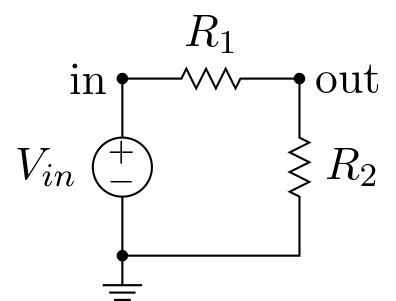

In [ ]:

circuit = Circuit('Voltage Divider')

circuit.V('input', 'in', circuit.gnd, 10@u_V)
circuit.R(1, 'in', 'out', 9@u_kΩ)
circuit.R(2, 'out', circuit.gnd, 1@u_kΩ)


simulator = circuit.simulator(temperature=25, nominal_temperature=25)

analysis = simulator.operating_point()
for node in (analysis['in'], analysis.out): # .in is invalid !
    print('Node {}: {} V'.format(str(node), float(node)))


Node in: 10.0 V
Node out: 1.0 V


In [ ]:

# Fixme: Xyce sensitivity analysis
analysis = simulator.dc_sensitivity('v(out)')
for element in analysis.elements.values():
    print(element, float(element))


vinput 0.09999999999621426
r1_scale -0.8999991000992625
r1_bv_max -0.0
r1_m 0.8999999999287899
r1_w -0.0
r1_l -0.0
r1 -9.999990001102918e-05
r1:ef -0.0
r1:wf -0.0
r1:lf -0.0
r1:bv_max -0.0
r2_scale 0.899999099855317
r2_bv_max -0.0
r2_m -0.8999999999165925
r2_w -0.0
r2_l -0.0
r2 0.0008999991000504734
r2:ef -0.0
r2:wf -0.0
r2:lf -0.0
r2:bv_max -0.0
